In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [2]:
hdb_resale_data = pd.read_csv("data/processed/hdb_resale_data_final.csv", index_col=0)

<h2> Explanatory Data Analysis of HDB Resale Price

In [3]:
hdb_resale_data.shape

(249857, 13)

In [4]:
hdb_resale_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,num_mrts_within_1km,min_dist_to_mrt_km
_id,,,,,,,,,,,,,
1,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,1,0.352915
2,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,0,0.816023
3,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,1,0.229604
4,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,1,0.664472
5,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,0,0.923402


In [5]:
hdb_resale_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249857 entries, 1 to 212704
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                249857 non-null  object 
 1   town                 249857 non-null  object 
 2   flat_type            249857 non-null  object 
 3   block                249857 non-null  object 
 4   street_name          249857 non-null  object 
 5   storey_range         249857 non-null  object 
 6   floor_area_sqm       249857 non-null  float64
 7   flat_model           249857 non-null  object 
 8   lease_commence_date  249857 non-null  int64  
 9   remaining_lease      249857 non-null  int64  
 10  resale_price         249857 non-null  float64
 11  num_mrts_within_1km  249857 non-null  int64  
 12  min_dist_to_mrt_km   249857 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 26.7+ MB


In [6]:
numerical_features = hdb_resale_data.select_dtypes(include=['int64', 'float64']).reset_index(drop=True)

numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,249857.0,96.870696,24.057105,31.000000,80.000000,93.000000,112.000000,3.667000e+02
lease_commence_date,249857.0,1995.555342,13.937465,1966.000000,1985.000000,1996.000000,2006.000000,2.022000e+03
remaining_lease,249857.0,73.899823,13.734075,40.000000,63.000000,73.000000,86.000000,9.700000e+01
resale_price,249857.0,506457.831953,179415.160650,140000.000000,375000.000000,470000.000000,608000.000000,1.658888e+06
num_mrts_within_1km,249857.0,0.632566,0.714089,0.000000,0.000000,1.000000,1.000000,6.000000e+00
min_dist_to_mrt_km,249857.0,0.774630,0.437265,0.037148,0.457164,0.691146,0.991647,3.594500e+00


In [7]:
categorical_features = hdb_resale_data.select_dtypes(include=['object']).reset_index(drop=True)

categorical_features.describe().T

,count,unique,top,freq
month,249857,127,2024-07,3036
town,249857,26,SENGKANG,20086
flat_type,249857,7,4 ROOM,105192
block,249857,2745,2,801
street_name,249857,576,YISHUN RING RD,3665
storey_range,249857,17,04 TO 06,57777
flat_model,249857,21,Model A,86782


<h3>Checking for missing value

In [8]:
numerical_features.isnull().sum()

floor_area_sqm         0
lease_commence_date    0
remaining_lease        0
resale_price           0
num_mrts_within_1km    0
min_dist_to_mrt_km     0
dtype: int64

In [9]:
categorical_features.isnull().sum()

month           0
town            0
flat_type       0
block           0
street_name     0
storey_range    0
flat_model      0
dtype: int64

<h2> Exploring the dependant variables

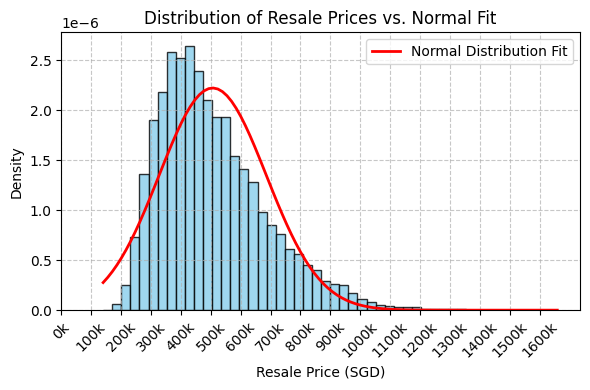

In [10]:
plt.figure(figsize=(6, 4))

# Histogram of resale prices
plt.hist(hdb_resale_data['resale_price'], bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.8)

# For normal distribution curve
mu, sigma = stats.norm.fit(hdb_resale_data['resale_price'])
x_norm = np.linspace(hdb_resale_data['resale_price'].min(), hdb_resale_data['resale_price'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)
plt.plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal Distribution Fit')

# Format x-axis in thousands, show fewer ticks
step = 100000  
xticks = np.arange(0, hdb_resale_data['resale_price'].max(), step)
plt.xticks(xticks, [f'{int(x/1000)}k' for x in xticks], rotation=45)

plt.title('Distribution of Resale Prices vs. Normal Fit')
plt.xlabel('Resale Price (SGD)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

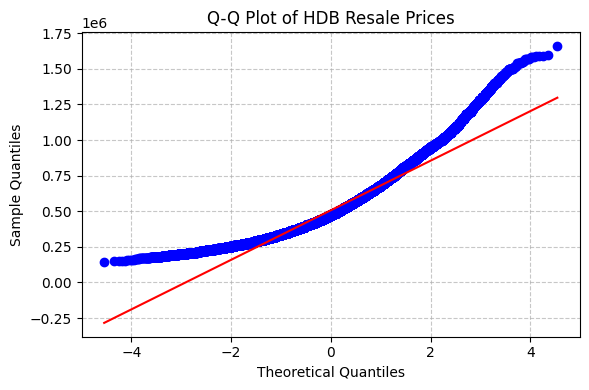

In [11]:
plt.figure(figsize=(6, 4))

# QQ-plot of resale prices
stats.probplot(hdb_resale_data['resale_price'], dist="norm", plot=plt)

plt.title("Q-Q Plot of HDB Resale Prices")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The resale price distribution is skewed, with a long tail of high-value flats. Both the histogram and Q-Q plot confirm that the dataset does not follow a normal distribution. This likely reflects real market variations; therefore, outliers were not removed but flagged for reference. Further analysis will compare model behavior with and without outliers to evaluate their impact on performance.

In [12]:
Q1 = hdb_resale_data['resale_price'].quantile(0.25)
Q3 = hdb_resale_data['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

hdb_resale_data['is_outlier'] = (
    (hdb_resale_data['resale_price'] < lower_bound) | 
    (hdb_resale_data['resale_price'] > upper_bound)
)

<h2> Correlation matrix between numerical variables

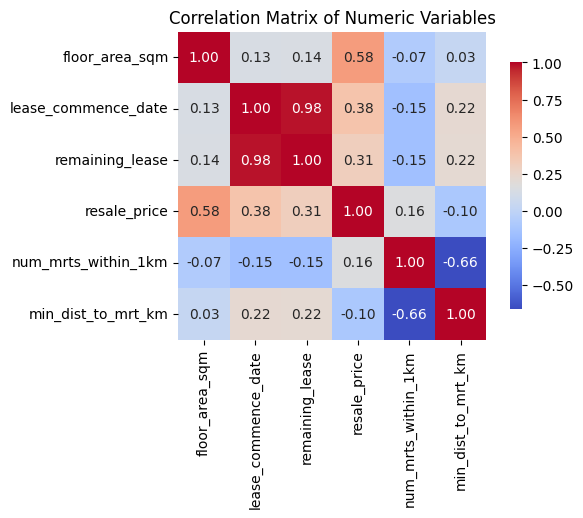

In [13]:
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(hdb_resale_data[numerical_features.columns].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title("Correlation Matrix of Numeric Variables")
plt.show()

Conclusion :
* There is a strong linear correlation between remaining_lease and lease_commence_date. This is expected and suggests dropping one to avoid redundancy.
* Moderate positive correlation between floor_area_sqm and resale_price : floor_area_sqm is a fairly strong predictor of resale price
* Moderate positive correlations between lease_commence_date (~0.38) and remaining_lease (~0.31) with resale_price: These factors may have a small impact on resale price.
* MRT-related features are correlated with each other but show weak correlation with resale price in this dataset.

<h2> HDB resale prices differ significantly between towns.


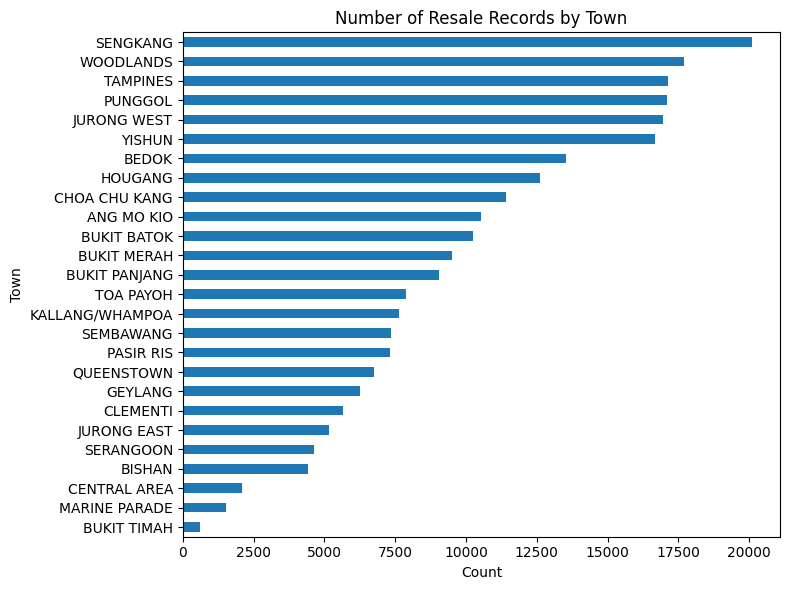

In [14]:
plt.figure(figsize=(8, 6))
hdb_resale_data['town'].value_counts(ascending=False).plot(kind='barh')

plt.gca().invert_yaxis()  
plt.xlabel("Count")
plt.ylabel("Town")
plt.title("Number of Resale Records by Town")
plt.tight_layout()
plt.show()


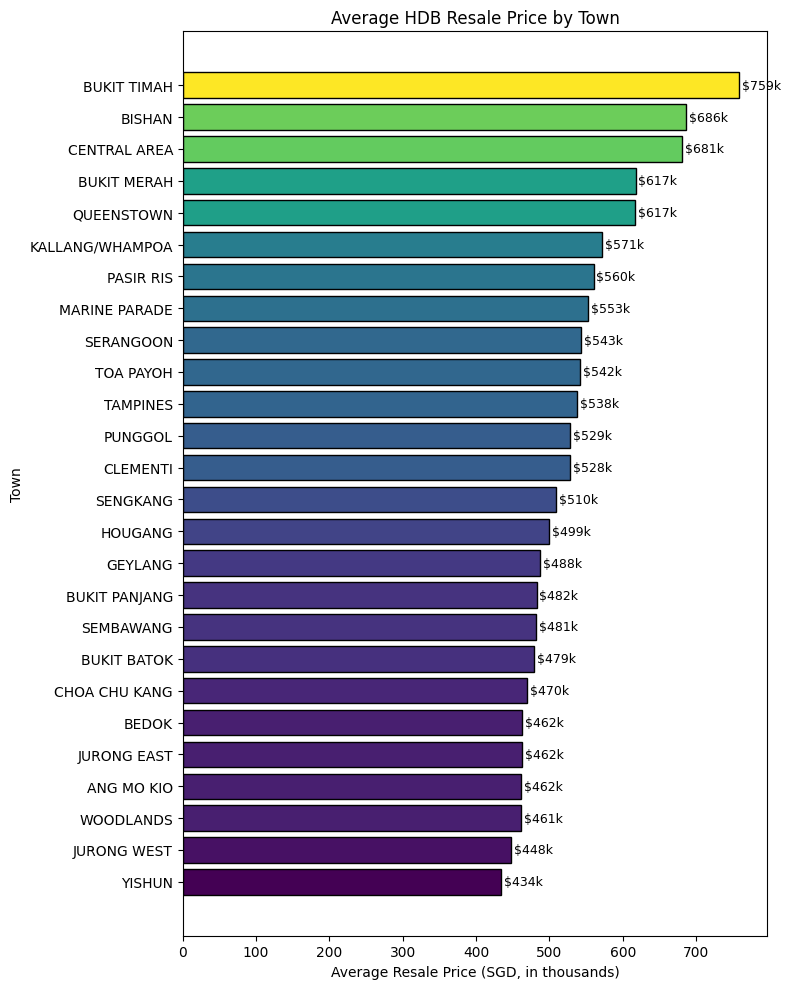

In [15]:
# Average resale price by town 
avg_price_by_town = hdb_resale_data.groupby('town')['resale_price'].mean().sort_values(ascending=True) / 1000

# Normalize prices for color mapping (0 to 1)
norm = plt.Normalize(avg_price_by_town.min(), avg_price_by_town.max())
colors = plt.cm.viridis(norm(avg_price_by_town.values))

# Plot horizontal bar chart with color gradient
plt.figure(figsize=(8, 10))
bars = plt.barh(avg_price_by_town.index, avg_price_by_town.values, color=colors, edgecolor='black')

# Add price labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 4, bar.get_y() + bar.get_height() / 2,
        f'${width:,.0f}k',
        ha='left', va='center', fontsize=9
    )

plt.xlabel("Average Resale Price (SGD, in thousands)")
plt.ylabel("Town")
plt.title("Average HDB Resale Price by Town")
plt.tight_layout()
plt.show()

The variable town is not evenly distributed. However, the average price reflects actual economic and demographic realities, not just noise. Removing or resampling may not be ideal since it risks losing valuable context about pricing dynamics in wealthier or niche areas. 

<h2>Distribution of HDB Resale Transactions by Flat Model

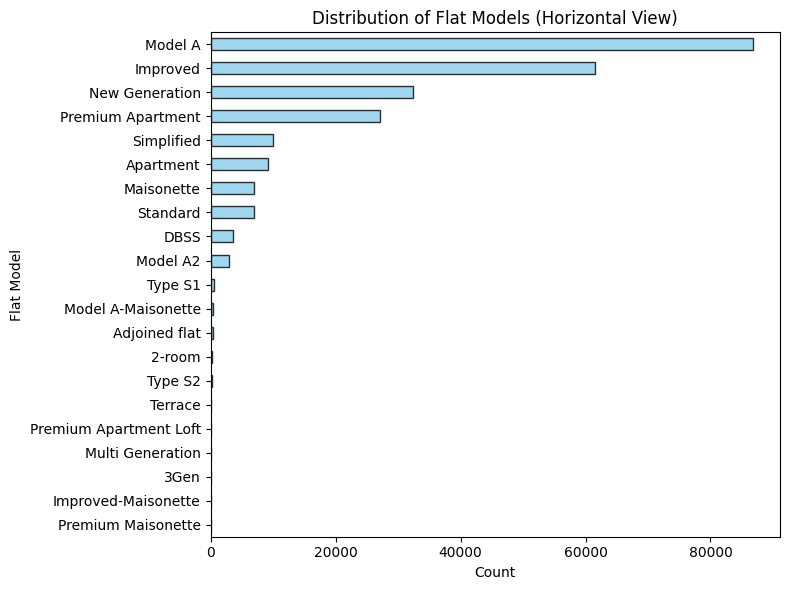

In [16]:
# Count number of records per flat model
flat_model_counts = hdb_resale_data['flat_model'].value_counts().sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
flat_model_counts.plot(kind='barh', color='skyblue', edgecolor='black', alpha=0.8)

plt.xlabel("Count")
plt.ylabel("Flat Model")
plt.title("Distribution of Flat Models (Horizontal View)")
plt.tight_layout()
plt.show()


The chart shows the number of resale transactions for each flat model, sorted from lowest to highest. Flat models such as Type S1 and Premium Maisonette have noticeably fewer transactions compared to more common models. It is recommended to consider grouping rare flat models together or removing them for analysis.

C:\Users\faldh\AppData\Local\Temp\ipykernel_68600\2632941364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hdb_resale_data, x='flat_model', y='resale_price', palette='Set2')


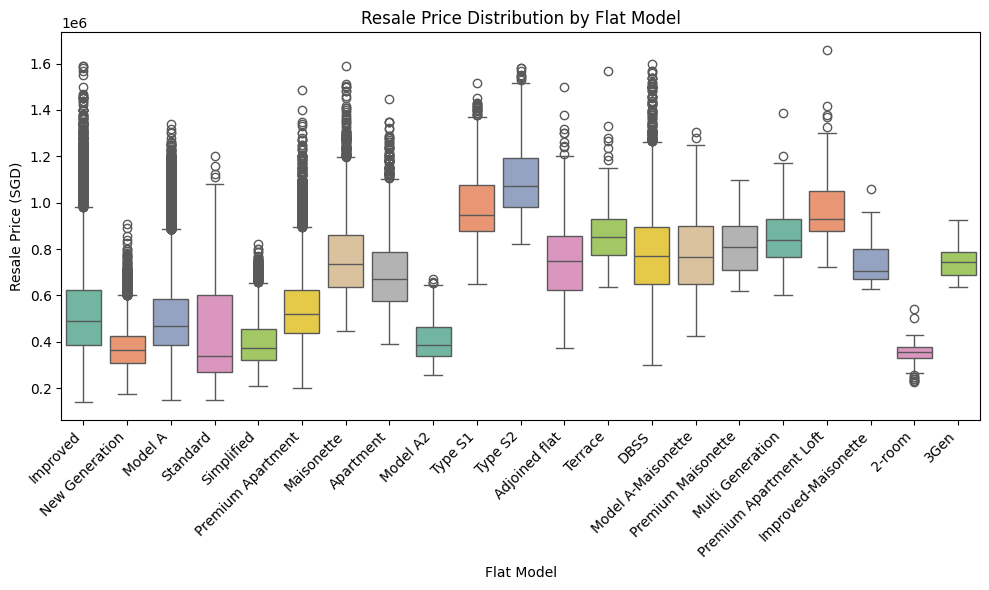

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=hdb_resale_data, x='flat_model', y='resale_price', palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.title("Resale Price Distribution by Flat Model")
plt.xlabel("Flat Model")
plt.ylabel("Resale Price (SGD)")
plt.tight_layout()
plt.show()

The boxplot shows clear differences in resale price distributions among flat models, with median prices varying substantially across types. This visual evidence supports that flat model type has a significant effect on resale price

In [19]:
from scipy.stats import kruskal

# Prepare groups for each flat model
groups = [group['resale_price'].values for _, group in hdb_resale_data.groupby('flat_model')]

# Perform Kruskal-Wallis H-test
h_stat, p_val = kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {h_stat:.2f}, p-value: {p_val:.4f}")


Kruskal-Wallis H-statistic: 64008.44, p-value: 0.0000


Since the p-value is far below the typical significance threshold of 0.05, this further confirm that resale prices differ significantly between different flat models.

<h2>Distribution of HDB Resale Transactions by Flat Type

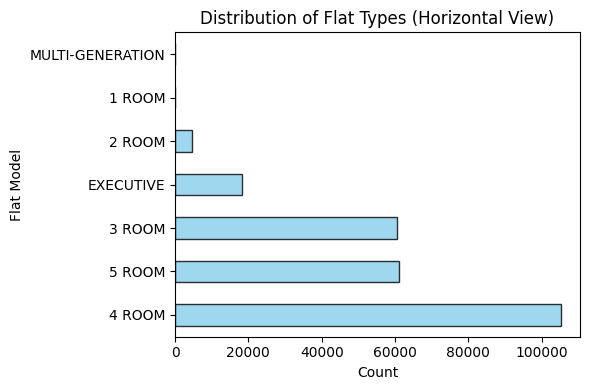

In [ ]:
# Count number of records per flat model
flat_model_counts = hdb_resale_data['flat_type'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
flat_model_counts.plot(kind='barh', color='skyblue', edgecolor='black', alpha=0.8)

plt.xlabel("Count")
plt.ylabel("Flat Model")
plt.title("Distribution of Flat Types (Horizontal View)")
plt.tight_layout()
plt.show()



C:\Users\faldh\AppData\Local\Temp\ipykernel_64404\767780239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hdb_resale_data, x='flat_type', y='resale_price', palette='Set2')


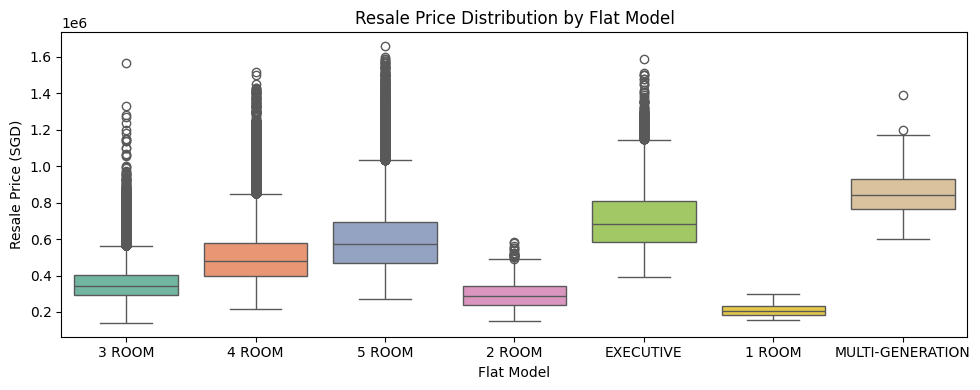

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=hdb_resale_data, x='flat_type', y='resale_price', palette='Set2')

plt.title("Resale Price Distribution by Flat Model")
plt.xlabel("Flat Model")
plt.ylabel("Resale Price (SGD)")
plt.tight_layout()
plt.show()

The boxplot shows clear differences in resale price distributions among flat type, with median prices varying substantially across types. This visual evidence supports that flat model type has a significant effect on resale price

<h2>Are resale prices higher for HDBs located closer to MRT stations?

In [ ]:
print('correlation between distance to MRT and resale price is ' + str(round(hdb_resale_data['resale_price'].corr(hdb_resale_data['min_dist_to_mrt_km']),4)))

correlation between distance to MRT and resale price is -0.1019


In [ ]:
grouped_prices = [
    group['resale_price'].values
    for _, group in hdb_resale_data.groupby('min_dist_to_mrt_km')
]

stat, p = kruskal(*grouped_prices)
print(f"Kruskal-Wallis H-statistic: {stat:.2f}, p-value: {p:.4f}")


Kruskal-Wallis H-statistic: 178527.09, p-value: 0.0000


There is not enough evidance to say that MRT distance to HDB could affect the resale price of an HDB

<h2>Does the number of nearby MRT stations affect HDB prices?

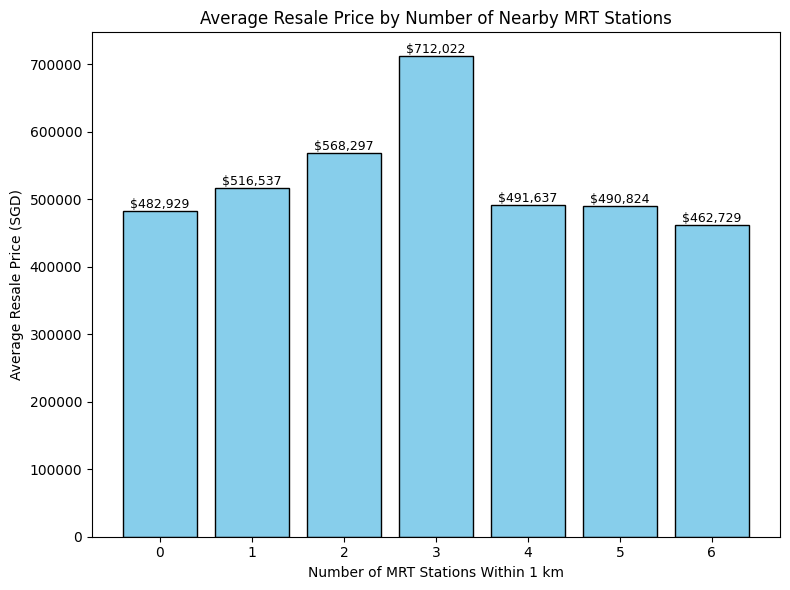

In [ ]:
import matplotlib.pyplot as plt

# Calculate average resale price grouped by number of MRTs nearby
avg_price_by_mrt = hdb_resale_data.groupby('num_mrts_within_1km')['resale_price'].mean()

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_price_by_mrt.index.astype(str), avg_price_by_mrt.values, color='skyblue', edgecolor='black')

# Add price labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'${height:,.0f}', 
             ha='center', va='bottom', fontsize=9)

plt.xlabel("Number of MRT Stations Within 1 km")
plt.ylabel("Average Resale Price (SGD)")
plt.title("Average Resale Price by Number of Nearby MRT Stations")
plt.tight_layout()
plt.show()


In [ ]:
corr = hdb_resale_data['num_mrts_within_1km'].corr(hdb_resale_data['resale_price'])
print(f"Correlation between number of MRTs nearby and resale price: {corr:.3f}")

Correlation between number of MRTs nearby and resale price: 0.159


There is no strong correlation overall, but flats with 3 MRT stations nearby tend to have somewhat higher resale prices.

<h2>Are there seasonal or yearly trends in resale prices over time?

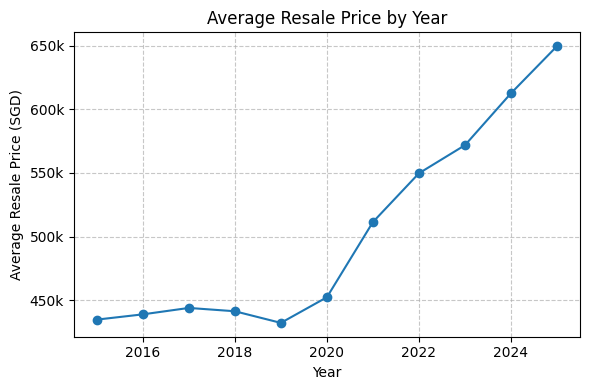

In [ ]:
from matplotlib.ticker import FuncFormatter

# Extract year from month column
hdb_resale_data['year'] = hdb_resale_data['month'].str[:4].astype(int)

avg_price_by_year = hdb_resale_data.groupby('year')['resale_price'].mean()

plt.figure(figsize=(6, 4))
avg_price_by_year.plot(kind='line', marker='o')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
plt.title("Average Resale Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Resale Price (SGD)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

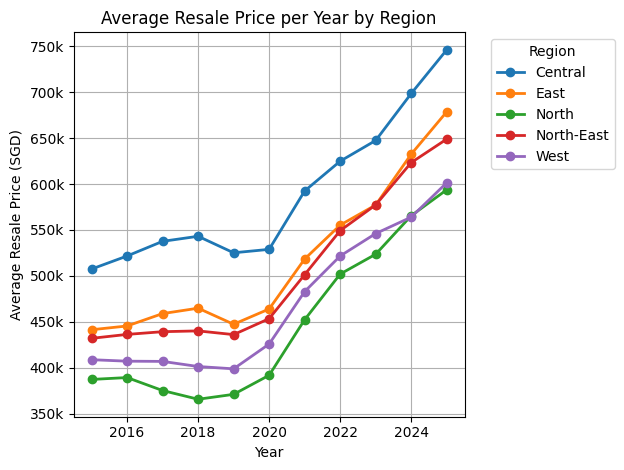

In [ ]:
town_to_region = {
    'ANG MO KIO': 'North-East',
    'BEDOK': 'East',
    'BISHAN': 'Central',
    'BUKIT BATOK': 'West',
    'BUKIT MERAH': 'Central',
    'BUKIT PANJANG': 'West',
    'BUKIT TIMAH': 'Central',
    'CHOA CHU KANG': 'West',
    'CLEMENTI': 'West',
    'GEYLANG': 'Central',
    'HOUGANG': 'North-East',
    'JURONG EAST': 'West',
    'JURONG WEST': 'West',
    'KALLANG/WHAMPOA': 'Central',
    'MARINE PARADE': 'East',
    'PASIR RIS': 'East',
    'PUNGGOL': 'North-East',
    'QUEENSTOWN': 'Central',
    'SEMBAWANG': 'North',
    'SENGKANG': 'North-East',
    'TAMPINES': 'East',
    'TOA PAYOH': 'Central',
    'WOODLANDS': 'North',
    'YISHUN': 'North',
    'CENTRAL AREA': 'Central',  
    'SERANGOON': 'North-East'
}

# Create the region column by mapping town names
hdb_resale_data['region'] = hdb_resale_data['town'].map(town_to_region)

# Group by year and region, then calculate average resale price
avg_price_by_region = (
    hdb_resale_data
    .groupby([hdb_resale_data['year'], hdb_resale_data['region']])['resale_price']
    .mean()
    .unstack()  # Regions become separate lines
)

# Plotting
plt.figure(figsize=(8, 6))
avg_price_by_region.plot(marker='o', linewidth=2)

plt.title("Average Resale Price per Year by Region")
plt.xlabel("Year")
plt.ylabel("Average Resale Price (SGD)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Format y-axis labels in thousands
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))

plt.tight_layout()
plt.show()

The Hbd prices between 2015 to 2020 were relatively stable, however after 2020 the prices started to rise drastically, probably due to post covid inflation. This is a strong evidence that seasonality exist in the dataset. Based on this finding, when training a model, it is might be necessary to evaluate performance uinsg both post covid data and the full dataset. Also, models that incorporate time features, such as tree-based models (XGBoost, LightGBM) and ARIMA, may perform better for this type of dataset.

<h2>Does the floor level influence the HDB price?

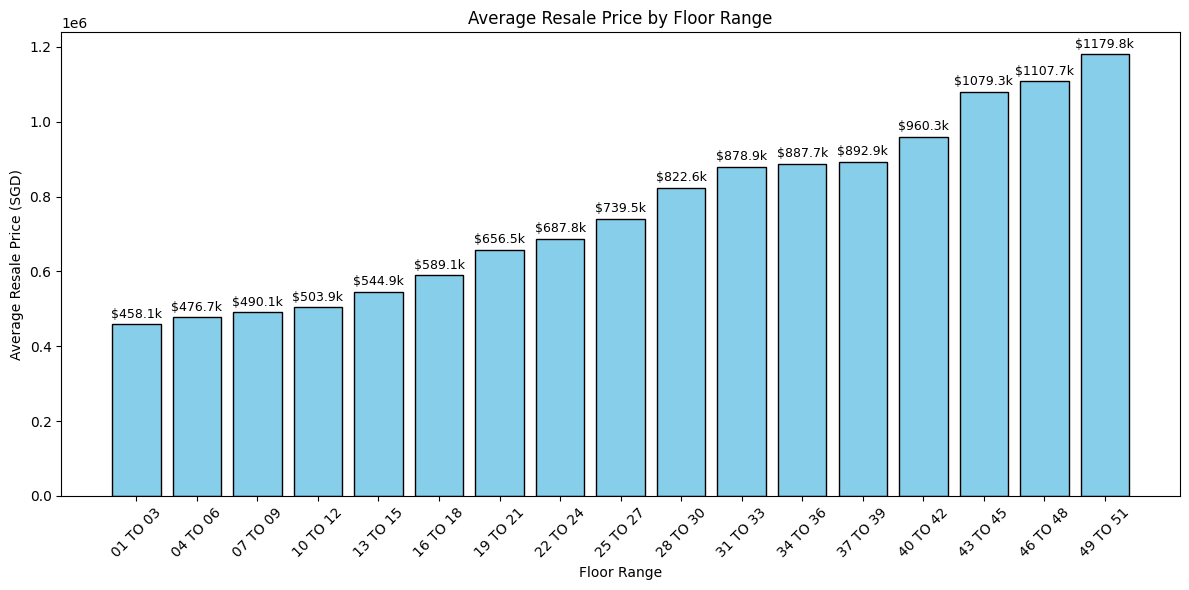

In [ ]:
# Calculate average resale price by storey_range
avg_price_by_floor = hdb_resale_data.groupby('storey_range')['resale_price'].mean()

# Sort floor ranges by their numeric lower bound for proper order
def floor_sort_key(floor_range):
    return int(floor_range.split(' TO ')[0])

avg_price_by_floor = avg_price_by_floor.sort_index(key=lambda x: x.map(floor_sort_key))

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_price_by_floor.index, avg_price_by_floor.values, color='skyblue', edgecolor='black')

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 10000,  
        f'${height/1000:.1f}k',    
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.xticks(rotation=45)
plt.xlabel("Floor Range")
plt.ylabel("Average Resale Price (SGD)")
plt.title("Average Resale Price by Floor Range")
plt.tight_layout()
plt.show()


Higher floor levels are associated with higher HDB resale prices.